<a href="https://colab.research.google.com/github/CMPSC-310-AI-Spring2023/project02_computer-vision-andre/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import json
import cv2
import glob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


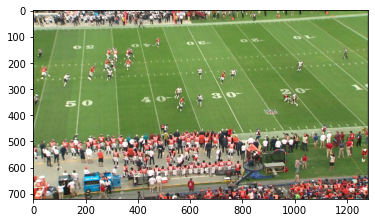

In [6]:
sample_image_path = '/content/drive/MyDrive/archive/data_labelme_format/57524_000575_Sideline_frame1007.jpg'
sample_label_json_path = sample_image_path.split('.')[0] + '.json'

sample_image_array = cv2.cvtColor(cv2.imread(sample_image_path), cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_array)

In [7]:
with open(sample_label_json_path, 'r') as f:
    sample_label_obj = json.load(f)
    
sample_label_obj;

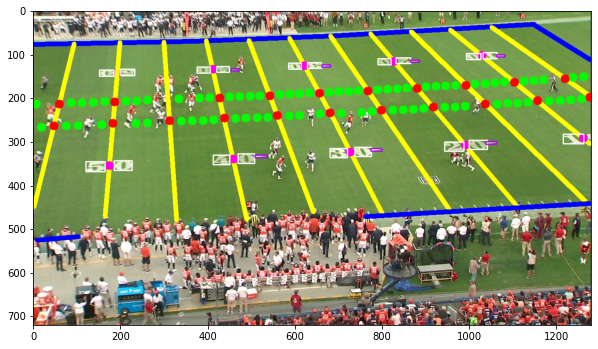

In [8]:
for shape in sample_label_obj['shapes']:
    label_name = shape['label']
    
    if label_name == 'line1':
        point_0 = shape['points'][0]
        point_1 = shape['points'][1]        
        x0, y0 = int(point_0[0]), int(point_0[1])        
        x1, y1 = int(point_1[0]), int(point_1[1])
        cv2.line(sample_image_array, [x0,y0], [x1,y1], (0,0,255), 10)
        
    if label_name == 'line0':
        point_0 = shape['points'][0]
        point_1 = shape['points'][1]        
        x0, y0 = int(point_0[0]), int(point_0[1])        
        x1, y1 = int(point_1[0]), int(point_1[1])
        cv2.line(sample_image_array, [x0,y0], [x1,y1], (255,255,0), 10)
        
    if label_name == '0':
        point_0 = shape['points'][0]      
        x0, y0 = int(point_0[0]), int(point_0[1])  
        cv2.circle(sample_image_array, [x0,y0], 10, (255, 0, 227), -1)
        
    if label_name == '1':
        point_0 = shape['points'][0]      
        x0, y0 = int(point_0[0]), int(point_0[1])  
        cv2.circle(sample_image_array, [x0,y0], 10, (0, 255, 0), -1)
        
    if label_name == '2':
        point_0 = shape['points'][0]      
        x0, y0 = int(point_0[0]), int(point_0[1])  
        cv2.circle(sample_image_array, [x0,y0], 10, (255, 0, 0), -1)
        
        
    if label_name == 'arrow':
        point_0 = shape['points'][0]
        point_1 = shape['points'][1]        
        x0, y0 = int(point_0[0]), int(point_0[1])        
        x1, y1 = int(point_1[0]), int(point_1[1])
        cv2.rectangle(sample_image_array, [x0,y0], [x1,y1], (173, 3, 252), 2)
        
    if label_name.endswith('0') and len(label_name) == 2:
#         print(label_name)
        point_0 = shape['points'][0]
        point_1 = shape['points'][1]        
        x0, y0 = int(point_0[0]), int(point_0[1])        
        x1, y1 = int(point_1[0]), int(point_1[1])
        cv2.rectangle(sample_image_array, [x0,y0], [x1,y1], (255, 255, 255), 2)
    
plt.figure(figsize=(10,10))
plt.imshow(sample_image_array)

In [9]:
circle_radius = 2
for sample_label_json_path in glob.glob('/content/drive/MyDrive/archive/data_labelme_format/*.json'):
    with open(sample_label_json_path, 'r') as f:
        sample_label_obj = json.load(f)
        
    for shape in sample_label_obj['shapes']:  
        
        # convert points to circles        
        if shape['shape_type'] == 'point':
            center_point = shape['points'][0]
            shape['points'].append([center_point[0] + circle_radius, center_point[1] + circle_radius])
            shape['shape_type'] = 'circle'
            
    with open(sample_label_json_path, 'w') as outfile:
        json.dump(sample_label_obj, outfile)

In [11]:
line_width = 2
for sample_label_json_path in glob.glob('/content/drive/MyDrive/archive/data_labelme_format/*.json'):
    with open(sample_label_json_path, 'r') as f:
        sample_label_obj = json.load(f)
     
    for shape in sample_label_obj['shapes']:  
        
        # convert points to circles        
        if shape['shape_type'] == 'line':
            tmp_image_array = np.zeros([sample_label_obj['imageHeight'], sample_label_obj['imageWidth']])
            
            point_0 = shape['points'][0]
            point_1 = shape['points'][1]

            point_0 = (int(point_0[0]), int(point_0[1]))
            point_1 = (int(point_1[0]), int(point_1[1]))
            tmp_image_array = cv2.line(tmp_image_array.copy(), point_0, point_1, 1, 10) 
            contours, _ = cv2.findContours(tmp_image_array.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            shape['points']=contours[0][:,0].tolist()
            shape['shape_type'] = 'polygon'
        
        
    with open(sample_label_json_path, 'w') as outfile:
        json.dump(sample_label_obj, outfile)
        

# Pytorch Additions


In [12]:
pip install pycocotools segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16444 sha256=eb0f8a4e9dff77c7a4e242cbd4d9220d95df14e1980f04fb8e22a445c74c180a
  Stored in directory: /root/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60962 sha256=08905335896f26834d1758d5bebadad5a24bcbfd9e29effde0971d53372d00bb
  Stored in directory: /root/.cache/pip/w

In [13]:
from pycocotools.coco import COCO
import os
import shutil
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import glob
import json
import torch
import torchvision.transforms as transforms
import torch.utils.data as data
import pickle
from pycocotools.coco import COCO
import albumentations as albu

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
classes = [
#     0, #'0'
    1, #'1'
#     2, #'2
#     3, #'10'
#     4, #'20'
#     5, #'30'
#     6, #'40'
#     7, #'50'
#     8, #'00'
    9, #'arrow'
    10,#'line0'
    11,#'line1'
]

In [15]:
def get_training_augmentation():
    train_transform = [
        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=640, min_width=640, always_apply=True, border_mode=0),

        albu.GaussNoise(p=0.2),
        albu.Perspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightnessContrast(p=1),
                albu.RandomGamma(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.Sharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(640, 640)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')



def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [16]:
class CocoDataset(data.Dataset):
    def __init__(self, root, json, transform=None, preprocessing=None, classes=[i for i in range(12)]):
        self.root = root
        self.coco = COCO(json)
        self.ids = list(self.coco.anns.keys())
        self.channel_to_label = {cat['id']-1:cat['name'] for cat in self.coco.cats.values() if cat['supercategory'] != 'none'}
        self.label_to_channel = {cat['name']:cat['id']-1 for cat in self.coco.cats.values() if cat['supercategory'] != 'none'}
        self.classes = classes
#         self.num_classes = len(self.classes)
        self.num_classes = len([cat for cat in self.coco.cats.values() if cat['supercategory'] != 'none'])

        
        self.transform = transform
        self.preprocessing = preprocessing

    def __getitem__(self, index):
        ann_id = self.ids[index]
        img_id = self.coco.anns[ann_id]['image_id']
        img = self.coco.imgs[index]
        path = self.coco.loadImgs(index)[0]['file_name']

        cat_ids = self.coco.getCatIds()
        anns_ids = self.coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = self.coco.loadAnns(anns_ids)
        mask = np.zeros([int(img['width']), int(img['height']), self.num_classes]).astype(np.uint8)
        for i in range(len(anns)):
            channel_index = int(anns[i]['category_id']) - 1
            if channel_index in self.classes:
                mask[:,:,channel_index] = np.max([mask[:,:,channel_index], self.coco.annToMask(anns[i])], axis=0)        

        image = cv2.cvtColor(cv2.imread(os.path.join(self.root, path)), cv2.COLOR_BGR2RGB)
        if self.transform is not None:
            transformed  = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']
            
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
            
        return image, mask

    def __len__(self):
        return len(self.coco.imgs)

In [17]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

In [18]:
ENCODER = 'efficientnet-b7'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'softmax2d' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=12, 
    activation=ACTIVATION,
    in_channels=3,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


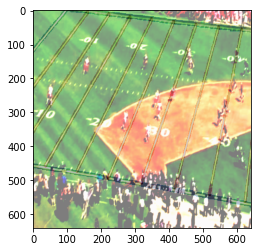

In [19]:
dataset_train = CocoDataset(
    '/content/drive/MyDrive/archive/coco-segmentation/train', 
    '/content/drive/MyDrive/archive/coco-segmentation/train/_annotations.coco.json',
    transform=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn)
)
dataset_test = CocoDataset(
    '/content/drive/MyDrive/archive/coco-segmentation/test', 
    '/content/drive/MyDrive/archive/coco-segmentation/test/_annotations.coco.json',
    transform=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn)
)
dataset_test_viz = CocoDataset(
    '/content/drive/MyDrive/archive/coco-segmentation/test', 
    '/content/drive/MyDrive/archive/coco-segmentation/test/_annotations.coco.json',
#     transform=get_validation_augmentation(),
#     preprocessing=get_preprocessing(preprocessing_fn)
)
dataset_valid = CocoDataset(
    '/content/drive/MyDrive/archive/coco-segmentation/valid', 
    '/content/drive/MyDrive/archive/coco-segmentation/valid/_annotations.coco.json',
    transform=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn)
)

dataset_train_sample = dataset_train[2]
plt.imshow(dataset_train_sample[0].transpose([1,2,0]))
plt.imshow(dataset_train_sample[1].transpose([1,2,0])[:,:,10], alpha=0.3, cmap='Reds')
plt.imshow(dataset_train_sample[1].transpose([1,2,0])[:,:,11], alpha=0.3, cmap='Blues')
plt.show()

In [20]:
train_loader = data.DataLoader(dataset_train, batch_size=1, shuffle=True, num_workers=2)
valid_loader = data.DataLoader(dataset_valid, batch_size=1, shuffle=False, num_workers=2)

In [21]:
from segmentation_models_pytorch import utils as smp_utils

# loss = smp_utils.losses.DiceLoss()
loss = smp_utils.losses.MSELoss()

metrics = [
    smp_utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=1e-5),
])

In [22]:
train_epoch = smp_utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp_utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

RuntimeError: ignored